<a href="https://colab.research.google.com/github/rallyfranky/my-first-repo/blob/main/cox_survive_model_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install lifelines
from lifelines import datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 5.2 MB/s 
     |████████████████████████████████| 77 kB 5.4 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=24ab3ef1cc884df47cc5bd9f60d5b9582d2001ed081a0b5d2cb51c980499dbab
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.5 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 

In [4]:
leukemia_data = datasets.load_leukemia()
leukemia_data.head(50)

,t,status,sex,logWBC,Rx
0,35,0,1,1.45,0
1,34,0,1,1.47,0
2,32,0,1,2.20,0
3,32,0,1,2.53,0
4,25,0,1,1.78,0
5,23,1,1,2.57,0
6,22,1,1,2.32,0
7,20,0,1,2.01,0
8,19,0,0,2.05,0
9,17,0,0,2.16,0


In [5]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(leukemia_data, duration_col='t', event_col='status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -69.59
         time fit was run = 2022-11-10 11:58:27 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
sex         0.31       1.37       0.45            -0.58             1.21                 0.56                 3.34
logWBC      1.68       5.38       0.34             1.02             2.34                 2.78                10.40
Rx          1.50       4.50       0.46             0.60             2.41                 1.82                11.11

            cmp to    z      p   -log2(p)
covariate                                
sex           0.00 0.69   0.49       1.03
logWBC        0.00 5.00 <0.005      20.71
Rx            0.00 3.26 <0.005       9.80
---
Concordance = 0.85
Partial AIC = 145.18
log-likelihood ratio test = 47.19 on 3 df
-log2(p) of ll-ratio test = 31.55

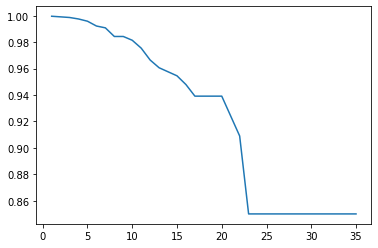

In [6]:
import matplotlib.pyplot as plt
result = cph.predict_survival_function(leukemia_data)
sample1 = result.iloc[:, 1]
plt.plot(sample1.index, sample1)
plt.show()

In [7]:
result

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
1.0,0.999679,0.999668,0.998867,0.998027,0.999441,0.997890,0.998614,0.999177,0.999357,0.999227,...,9.701326e-01,9.563371e-01,9.295375e-01,8.245874e-01,0.992645,8.984758e-01,6.148165e-01,7.897753e-01,0.986109,5.678317e-01
2.0,0.999227,0.999201,0.997273,0.995255,0.998654,0.994926,0.996665,0.998019,0.998452,0.998138,...,9.295749e-01,8.980575e-01,8.386390e-01,6.284446e-01,0.982378,7.727271e-01,3.098997e-01,5.664358e-01,0.966873,2.558999e-01
3.0,0.998767,0.998725,0.995654,0.992442,0.997853,0.991918,0.994685,0.996841,0.997533,0.997032,...,8.900372e-01,8.423878e-01,7.552469e-01,4.766515e-01,0.972038,6.627998e-01,1.543156e-01,4.038617e-01,0.947680,1.137024e-01
4.0,0.997682,0.997603,0.991839,0.985827,0.995965,0.984848,0.990023,0.994065,0.995363,0.994423,...,8.031788e-01,7.241893e-01,5.896935e-01,2.480506e-01,0.948039,4.612473e-01,2.971708e-02,1.816072e-01,0.903835,1.672806e-02
5.0,0.996042,0.995907,0.986095,0.975902,0.993115,0.974247,0.983011,0.989879,0.992088,0.990488,...,6.876021e-01,5.761114e-01,4.055383e-01,9.233203e-02,0.912850,2.665072e-01,2.457971e-03,5.419509e-02,0.841323,9.206865e-04
6.0,0.992528,0.992274,0.973870,0.954923,0.987021,0.951863,0.968120,0.980949,0.985093,0.982091,...,4.925187e-01,3.524882e-01,1.814813e-01,1.105597e-02,0.841627,8.205022e-02,1.163783e-05,4.037008e-03,0.721295,1.817500e-06
7.0,0.991180,0.990880,0.969207,0.946972,0.984686,0.943388,0.962451,0.977534,0.982415,0.978879,...,4.331803e-01,2.917804e-01,1.331931e-01,4.886103e-03,0.815729,5.214787e-02,1.484123e-06,1.486324e-03,0.679819,1.655381e-07
8.0,0.984866,0.984352,0.947584,0.910474,0.973785,0.904551,0.936243,0.961642,0.969921,0.963920,...,2.369057e-01,1.199964e-01,3.111117e-02,1.051646e-04,0.704269,6.192993e-03,9.268162e-11,1.355768e-05,0.514621,2.124579e-12
9.0,0.984866,0.984352,0.947584,0.910474,0.973785,0.904551,0.936243,0.961642,0.969921,0.963920,...,2.369057e-01,1.199964e-01,3.111117e-02,1.051646e-04,0.704269,6.192993e-03,9.268162e-11,1.355768e-05,0.514621,2.124579e-12
10.0,0.982096,0.981489,0.938208,0.894839,0.969019,0.887946,0.924920,0.954721,0.964466,0.957400,...,1.815784e-01,8.111425e-02,1.638962e-02,1.937034e-05,0.660111,2.421478e-03,1.300077e-12,1.710547e-06,0.455199,1.483896e-14


In [8]:
sample1

1.0     0.999668
2.0     0.999201
3.0     0.998725
4.0     0.997603
5.0     0.995907
6.0     0.992274
7.0     0.990880
8.0     0.984352
9.0     0.984352
10.0    0.981489
11.0    0.975533
12.0    0.966532
13.0    0.960681
15.0    0.954576
16.0    0.947951
17.0    0.939185
19.0    0.939185
20.0    0.939185
22.0    0.909044
23.0    0.850039
25.0    0.850039
32.0    0.850039
34.0    0.850039
35.0    0.850039
Name: 1, dtype: float64